<img src="./pic/sharif-main-logo.png" alt="SUT logo" width=345 height=345 align=left class="saturate">


<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2024<br>
<font color=3C99D size=5>
    Practical Assignment 2 - Unsupervised Learning<br>
<font color=696880 size=4>
    Assignment Supervisor: Niki Sepasian <br>
<font color=696880 size=5>
    Asemaneh Nafe


In [1]:
student_number = 401106617
full_name = 'Alireza Mirrokni'
assert student_number and full_name is not None, 'please input your information'

In [2]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster

<font color=red size=3>
notice that you can not use sklearn.decomposition and sklearn.cluster libary in this home work! you should implement pca and kmeans from scratch.

## Overview
In this assignment, you will perform PCA and K-Means clustering on credit card customer data. dataset contains information about customer’s use of credit cards. The goal is to reduce the dataset’s dimensionality using PCA and then apply clustering to segment customers. You will compare the clustering performance both before and after PCA. Additionally, you'll be asked to explain the theory and decisions behind each step.

## Data Preprocessing (15 points)
Read the dataset.CSV file and display a few samples.

In [24]:
# todo
df = pd.read_csv('dataset.csv')

print(df.head())

  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000       

Display dataset information.

In [25]:
# todo
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Which column do you think might be the most irrelevant for PCA and clustering?
<br>
Answer: 

In this dataset, the `CUST_ID` column is likely the most irrelevant feature for PCA and clustering. This column is simply an identifier unique to each customer and does not contain any meaningful information about their behavior or credit card usage patterns.


In [26]:
# Exclude irrelevant feature
df = df.drop(columns=['CUST_ID'])

print(df.head())

       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                

In [27]:
df.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

how do you handle missing data, and why did you choose this method?
<br>
Answer: 

To handle missing data, I start by identifying columns with missing values. For numerical columns, I fill missing values using the mean or median, depending on the data distribution. If the data is symmetrically distributed, I use the mean, while for skewed data, I use the median, as it’s less sensitive to outliers. This approach helps preserve the dataset's overall distribution.

In this dataset:
- The `CREDIT_LIMIT` and `MINIMUM_PAYMENTS` columns contain missing values.
- Since these columns likely represent skewed financial data, I fill missing values with the median to minimize the impact of outliers.

This method helps retain the integrity of the data distribution, which is important for accurate PCA and clustering results.


In [28]:
#Fill missing data
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(), inplace=True)
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)

df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

plot the correlation matrix and identify redundant features.remove them from the dataframe.

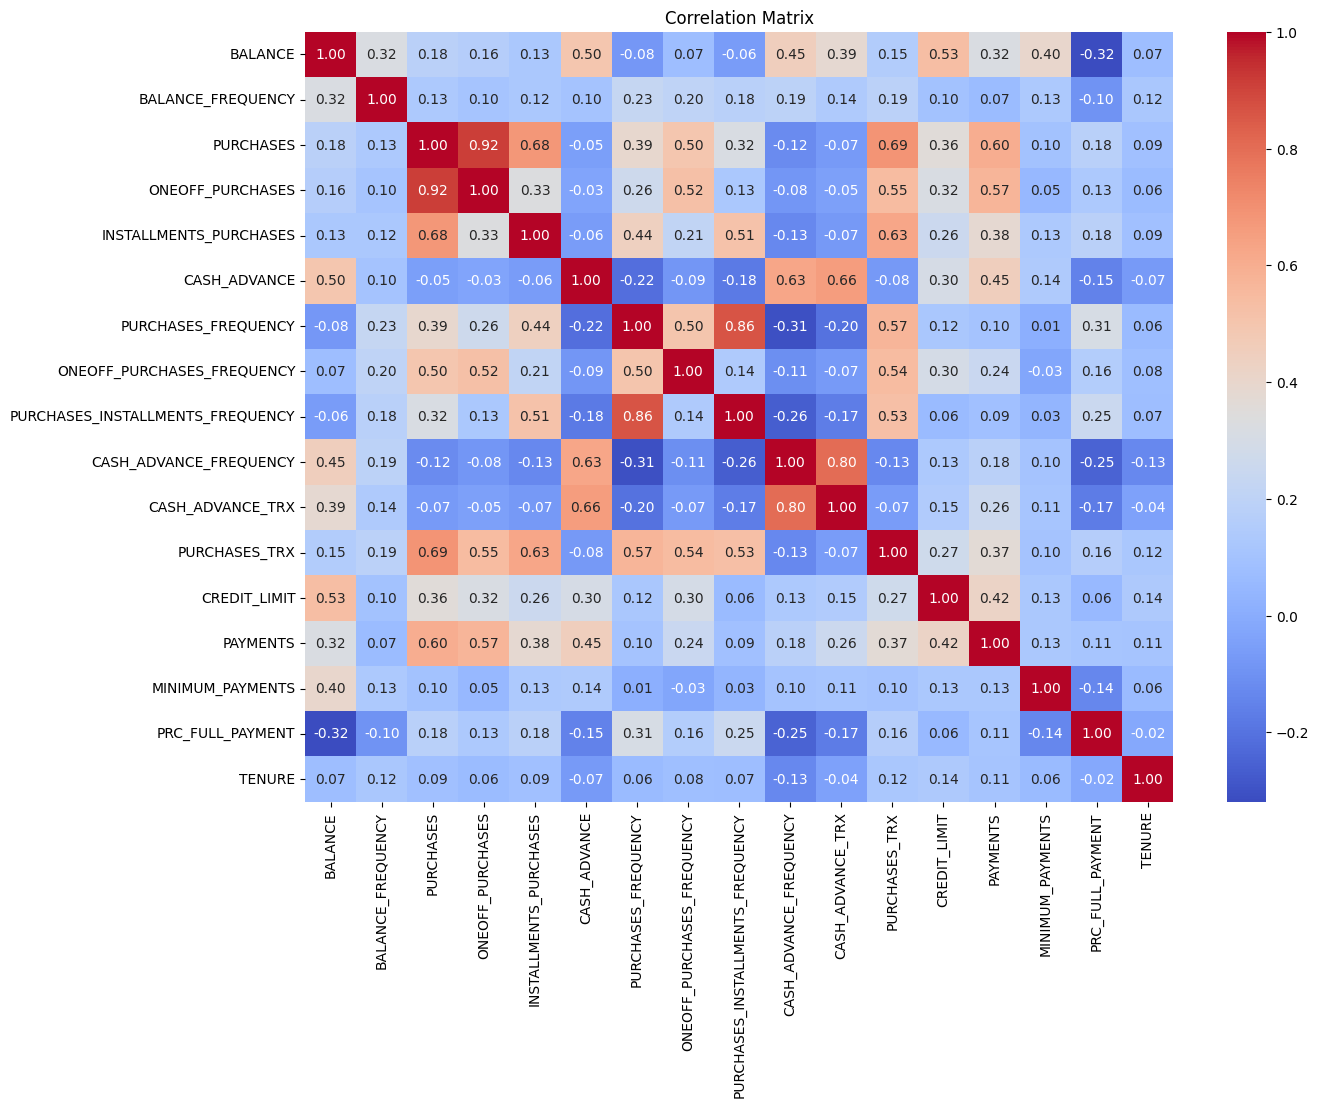

In [29]:
# Plot the correlation matrix
plt.figure(figsize=(14, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [30]:
# Identify and remove redundant features. use 0.8 threshold.
correlation_threshold = 0.8
high_correlation = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            colname = correlation_matrix.columns[i]
            high_correlation.add(colname)

print(f"Redundant features: {high_correlation}")

df = df.drop(columns=high_correlation)

Redundant features: {'ONEOFF_PURCHASES', 'PURCHASES_INSTALLMENTS_FREQUENCY'}


## Standardize the Data (5 points)
Standardize the dataset using z-score normalization

In [31]:
# todo
scaler = StandardScaler()

df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

df_scaled.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.349079,-0.466786,-0.806490,-0.678661,-0.675349,-0.476070,-0.511333,-0.960378,-0.528979,-0.302400,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.454576,2.605605,-1.221758,-0.678661,0.573963,0.110074,-0.591796,0.688678,0.818642,0.097500,0.234227,0.36068
2,0.447135,0.518084,-0.107668,-0.454576,-0.466786,1.269843,2.673451,-0.675349,-0.476070,-0.109020,0.826100,-0.383805,-0.093293,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,-0.454576,-0.368653,-1.014125,-0.399319,-0.258913,-0.329534,-0.551565,0.826100,-0.598688,-0.228307,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.454576,-0.466786,-1.014125,-0.399319,-0.675349,-0.476070,-0.551565,-0.905410,-0.364368,-0.257266,-0.525551,0.36068


Why is it important to standardize the data before applying PCA?
<br>
Answer:

Standardizing the data before applying PCA is essential because PCA is sensitive to the scale of the data. When features are on different scales, those with larger ranges dominate the principal components, leading to a biased analysis. Standardization ensures each feature contributes equally to the analysis by transforming all features to a common scale (mean 0, variance 1). This approach allows PCA to capture the true variance in the data, providing meaningful and balanced principal components.


What is differnce between Normalizer and StandardScaler classes. which is better for PCA?
<br>
Answer:

The `Normalizer` and `StandardScaler` classes serve different purposes in data preprocessing. `StandardScaler` transforms features to have a mean of 0 and a standard deviation of 1, preserving the variance structure of the data. This is crucial for PCA, as it ensures that features contribute equally to the analysis, making `StandardScaler` generally more suitable for PCA.

In contrast, `Normalizer` scales each data point (row) independently to have a unit norm (e.g., length of 1). This is beneficial for distance-based models (like K-means) when the focus is on direction rather than magnitude. However, it may distort the variance structure, so it is not ideal for PCA, where preserving the relationships between features across the dataset is essential.


## Principal Component Analysis (PCA) (35 points)
Implement PCA from scratch.

In [32]:
import numpy as np

class CustomPCA:
    def __init__(self, n_components=None):
        """
        Initialize the PCA class with the number of components to keep.
        n_components: Number of principal components to keep. If None, all components are kept.
        """
        self.n_components = n_components
        self.components = None  # To store the principal components (eigenvectors)
        self.mean = None        # To store the mean of the data (used for centering the data)
        self.explained_variance_ratio = None  # To store the explained variance ratio of the components

    def fit(self, X):
        """
        Fit the PCA model on the dataset X by calculating the eigenvalues and eigenvectors of the covariance matrix.
        X: Input data (n_samples, n_features)
        """
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean

        covariance_matrix = np.cov(X_centered, rowvar=False)

        eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

        sorted_indices = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[sorted_indices]
        eigenvectors = eigenvectors[:, sorted_indices]

        if self.n_components:
            eigenvectors = eigenvectors[:, :self.n_components]
            eigenvalues = eigenvalues[:self.n_components]

        self.components = eigenvectors
        self.explained_variance_ratio = eigenvalues / np.sum(eigenvalues)

    def transform(self, X):
        """
        Transform the input data X into the new space using the principal components.
        X: Input data (n_samples, n_features)
        """
        # Return the transformed data
        X_centered = X - self.mean
        
        return np.dot(X_centered, self.components)

    def get_explained_variance_ratio(self):
        """
        Return the explained variance ratio of each principal component.
        """
        return self.explained_variance_ratio

    def get_components(self):
        """
        Return the principal components (eigenvectors).
        """
        return self.components

### Visualizing the Cumulative Variance

Plot the cumulative explained variance to visualize the selection of components.  How many components are needed to explain 75% of the variance?
<br>
answer:

According to the code below, the answer is 6.

[ 25.4  47.7  56.4  63.9  70.5  76.1  81.4  85.7  89.5  92.6  94.6  96.3
  97.8  99.  100. ]


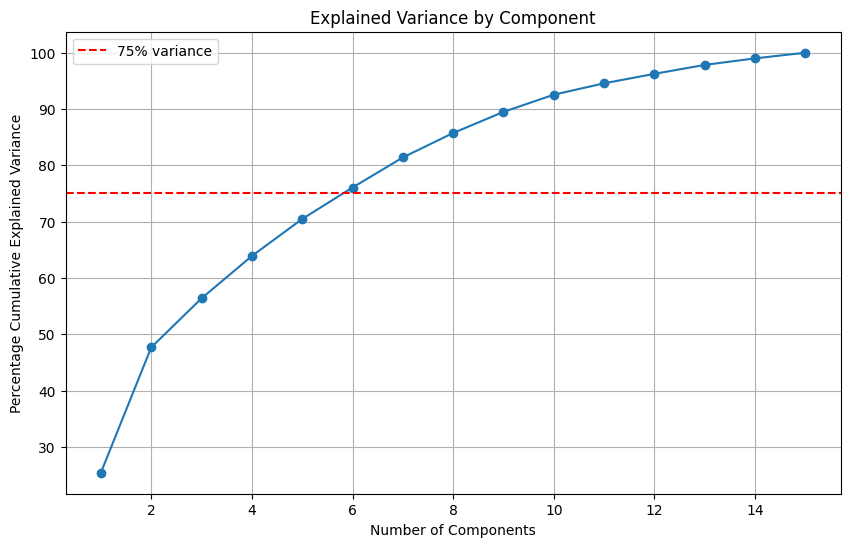

Number of components needed to explain 75% of the variance: 6


In [51]:
# todo
pca = CustomPCA(n_components=None)  
pca.fit(df_scaled) 

cumulative_variance = np.cumsum(pca.get_explained_variance_ratio()) * 100
print(np.round(cumulative_variance, 1))

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.axhline(y=75, color='r', linestyle='--', label='75% variance')
plt.xlabel('Number of Components')
plt.ylabel('Percentage Cumulative Explained Variance')
plt.title('Explained Variance by Component')
plt.legend()
plt.grid(True)  
plt.show()

n_components_75 = np.argmax(cumulative_variance >= 75) + 1
print(f"Number of components needed to explain 75% of the variance: {n_components_75}")

Build a new DataFrame with the first slected components. save it to a new CSV file named 'pca_output.csv'

In [41]:
#Build a new DataFrame with the first slected components
n_components_selected = 6 
pca = CustomPCA(n_components=n_components_selected)
pca.fit(df_scaled)  

transformed_data = pca.transform(df_scaled)

pca_df = pd.DataFrame(transformed_data, columns=[f'PC{i+1}' for i in range(n_components_selected)])

pca_df.to_csv('pca_output.csv', index=False)

print(pca_df.head())

        PC1       PC2       PC3       PC4       PC5       PC6
0  1.731242  0.824084 -0.384320 -0.451623 -0.087766  0.438057
1  0.301398 -2.533638  0.621582 -0.939313 -0.794456  0.060615
2 -1.194199  0.887568 -1.184455  1.129115 -1.152626 -1.869029
3  0.930140  0.030106 -0.111213 -1.309452 -0.505452 -0.834667
4  1.499511  0.517780 -0.794300 -0.125376 -0.253049  0.326998


We expect these new features to be orthogonal to each other. Check this and show the correlation between the features.

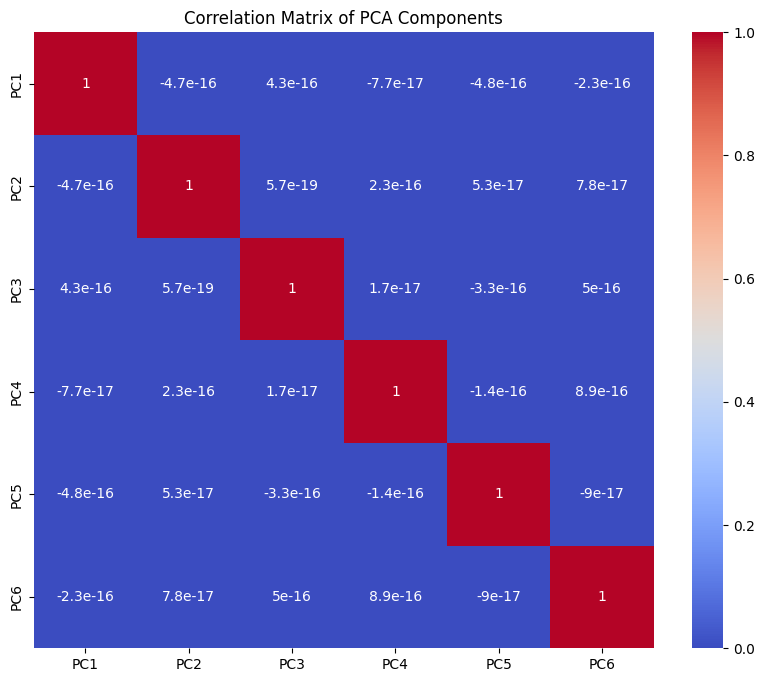

In [45]:
# todo
correlation_matrix = pca_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix of PCA Components")
plt.show()

## KMeans (45 points)
Implement kmeans from scratch.

In [48]:
import numpy as np

class CustomKMeans:
    def __init__(self, n_clusters=3, max_iter=100, random_state=42):
        """
        Initialize the KMeans class with the number of clusters and maximum iterations.
        n_clusters: Number of clusters to form.
        max_iter: Maximum number of iterations for convergence.
        random_state: Seed for reproducibility.
        """
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state
        self.centroids = None  # To store the centroids of clusters
        self.inertia_ = None   # To store the inertia (within-cluster sum of squares)
        self.labels_ = None    # To store the label assigned to each data point (cluster assignment)

    def fit(self, X):
        """
        Fit the KMeans model on the dataset X.
        X: Input data (n_samples, n_features)
        """
        X = np.array(X)
        np.random.seed(self.random_state)
        self.centroids = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]

        for _ in range(self.max_iter):
            distances = np.array([np.linalg.norm(X - centroid, axis=1) for centroid in self.centroids])
            self.labels_ = np.argmin(distances, axis=0)
            
            new_centroids = np.array([X[self.labels_ == k].mean(axis=0) for k in range(self.n_clusters)])

            if np.all(new_centroids == self.centroids):
                break

            self.centroids = new_centroids

        self.inertia_ = self._calculate_inertia(X)
        return self

    def _calculate_inertia(self, X):
        """
        Calculate the within-cluster sum of squared distances (inertia).
        X: Input data (n_samples, n_features)
        Returns: inertia (float)
        """
        # Step 1: For each cluster, compute the squared distances of points from their corresponding centroid
        # Step 2: Sum all squared distances to compute inertia
        return sum(np.sum((X[self.labels_ == k] - self.centroids[k]) ** 2) for k in range(self.n_clusters))

### Elbow Method
Apply the elbow method to determine the optimal number of clusters for K-Means. what is the best number of clusters?

In [56]:
# Initialize an empty list to store the WCSS values for each number of clusters
WCSS = []

# Apply KMeans for a range of cluster values (from 1 to 30)
for i in range(1, 30):
    # Initialize the CustomKMeans with `i` clusters and a random state of 42
    kmeans_pca = CustomKMeans(n_clusters=i, random_state=42)
    
    # Fit the model to the PCA-transformed data
    kmeans_pca.fit(pca_df)

    # Append the calculated inertia (WCSS) to the WCSS list
    WCSS.append(kmeans_pca.inertia_)

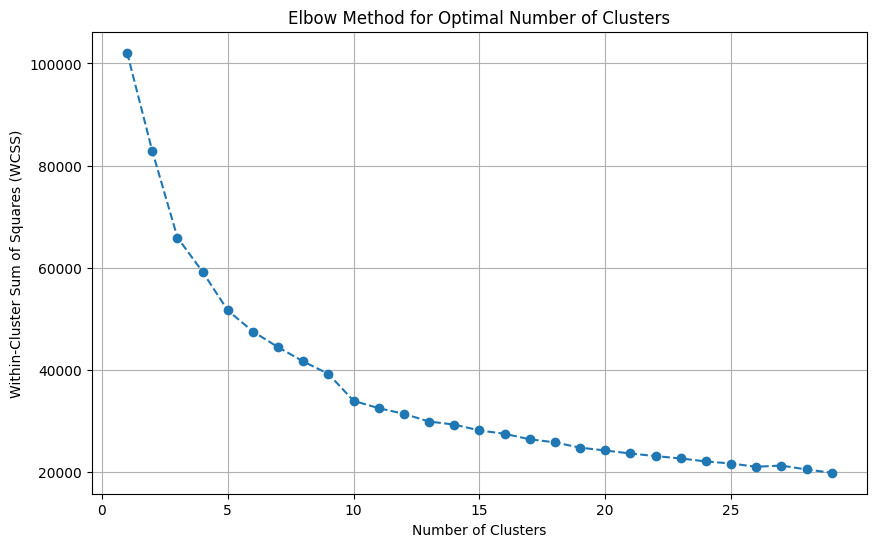

In [58]:
# Plot the Elbow curve using Matplotlib
plt.figure(figsize=(10, 6))
plt.plot(range(1, 30), WCSS, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xticks(range(0, 30, 5))
plt.grid(True, which='both', axis='both') 
plt.show()

Apply the optimal KMeans clustering on the PCA-transformed data, and assign cluster labels to each observation. Add a new column named segment to the df_pca DataFrame to store these labels.

In [ ]:
# Apply KMeans on PCA-reduced data with the optimal number of clusters based on the elbow method
# Add a new column 'segment' to pca data frame and assign the cluster labels to each observation
optimal_clusters = 5

kmeans_optimal = CustomKMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_optimal.fit(pca_df)

pca_df['segment'] = kmeans_optimal.labels_

pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,segment
0,1.731242,0.824084,-0.384320,-0.451623,-0.087766,0.438057,2
1,0.301398,-2.533638,0.621582,-0.939313,-0.794456,0.060615,1
2,-1.194199,0.887568,-1.184455,1.129115,-1.152626,-1.869029,3
3,0.930140,0.030106,-0.111213,-1.309452,-0.505452,-0.834667,2
4,1.499511,0.517780,-0.794300,-0.125376,-0.253049,0.326998,2


 visualize the clustering by plotting the pairwise relationships of the PCA-reduced features, color-coded by the cluster assignments.

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


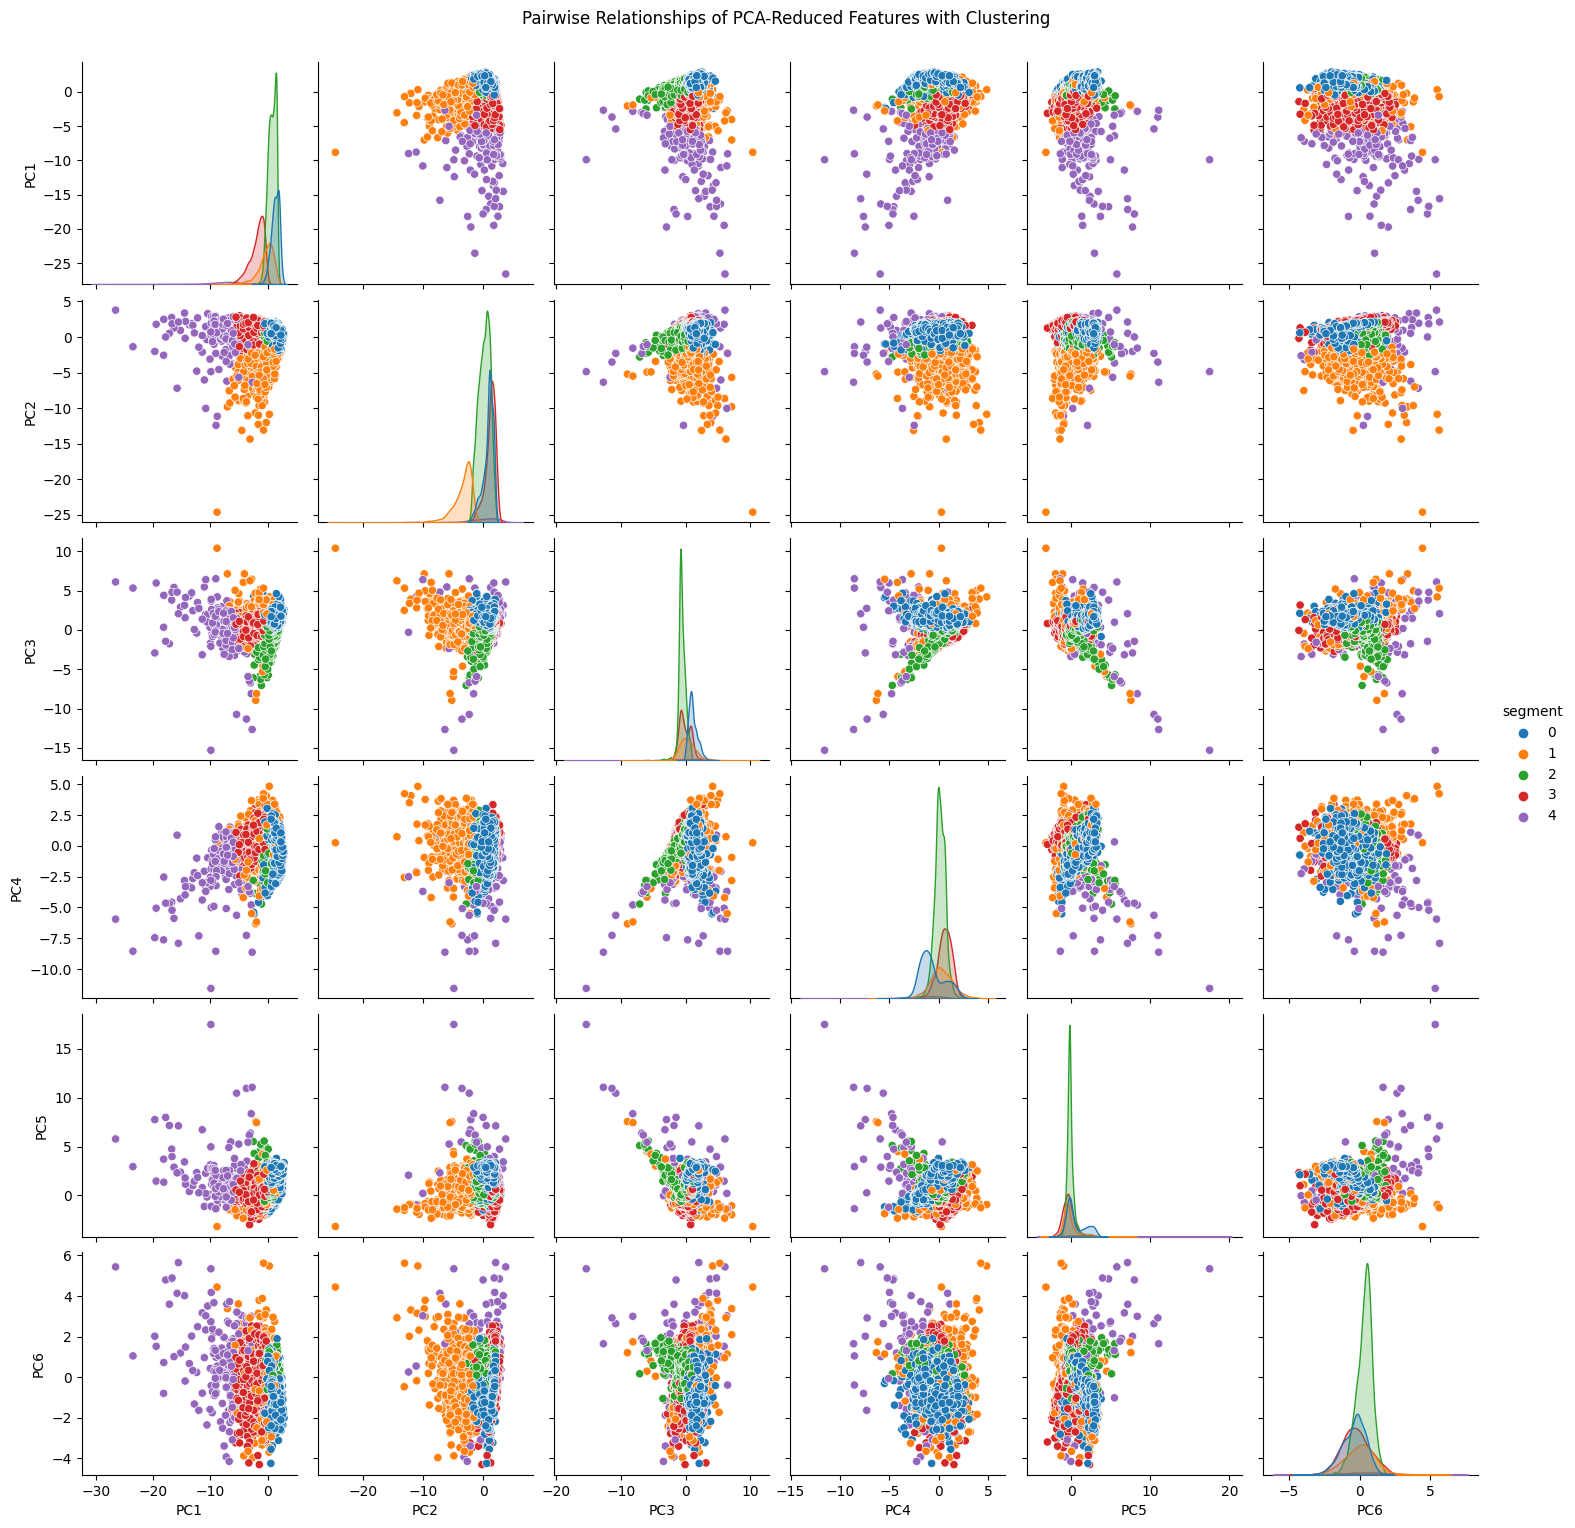

In [60]:
# todo
sns.pairplot(pca_df, hue='segment', palette='tab10', diag_kind='kde')
plt.suptitle('Pairwise Relationships of PCA-Reduced Features with Clustering', y=1.02)
plt.show()

So, when we employ PCA prior to using K-means we can visually separate almost the entire data set. That was one of the biggest goals of PCA - to reduce the number of variables by combining them into bigger, more meaningful features.

### Hierarchical Clustering
Perform hierarchical clustering on the reduced dataset after PCA. Use complete linkage method.


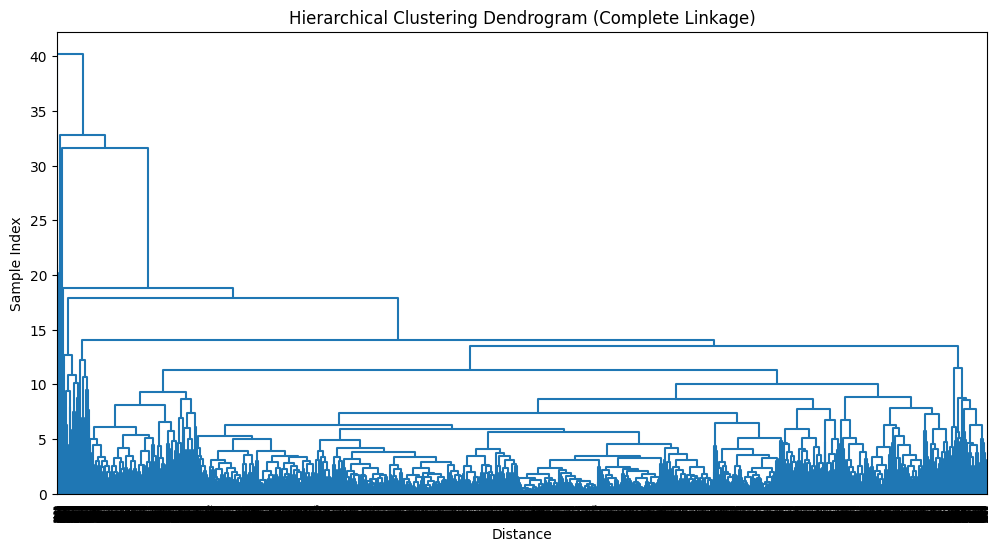

In [73]:
# Perform Hierarchical Clustering on the pca dataset
linked = linkage(pca_df.drop(columns=['segment']).iloc[:, :-1], method='complete')

# Visualize the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(
    linked,
    orientation='top', 
    show_leaf_counts=False,
    color_threshold=0
)

plt.title('Hierarchical Clustering Dendrogram (Complete Linkage)')
plt.xlabel('Distance')
plt.ylabel('Sample Index')
plt.show()

"Use scipy.cluster.hierarchy.fcluster to assign clusters from the dendrogram with a specified number of 5 clusters. Then visualize the results using pairplots.

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


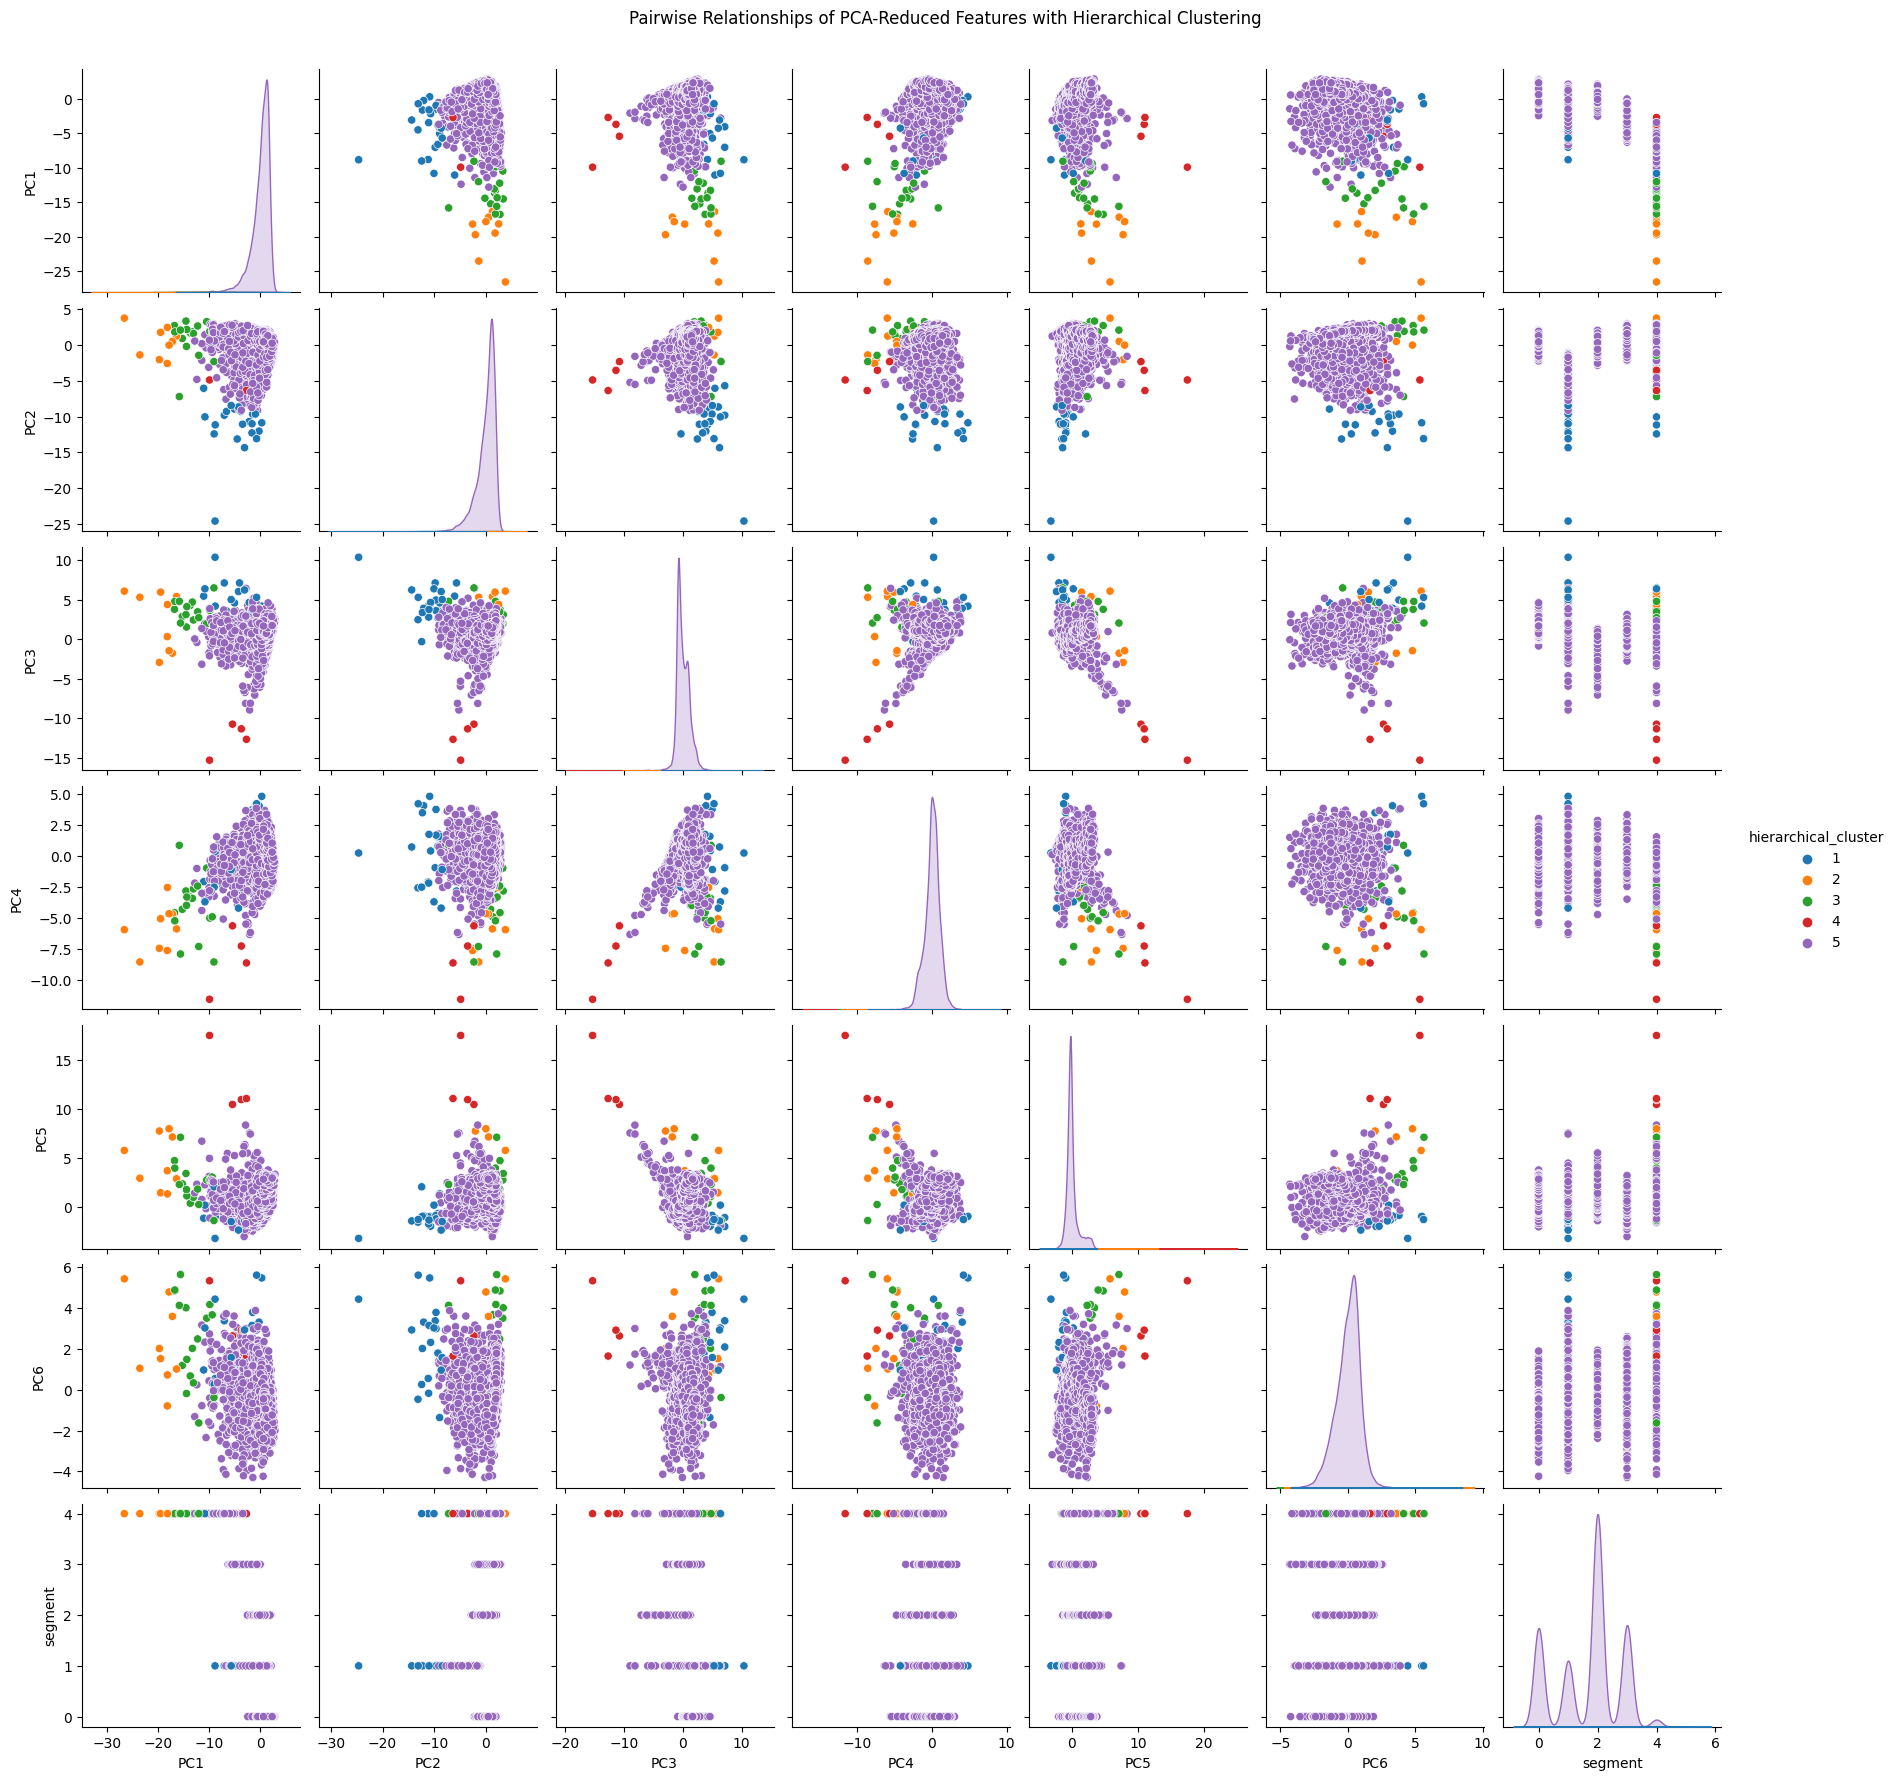

In [74]:
# Choose threshold and assign clusters
cluster_labels = fcluster(linked, 5, criterion='maxclust')

# Assign cluster labels to PCA DataFrame
pca_df['hierarchical_cluster'] = cluster_labels

# Visualize using PCA components
sns.pairplot(pca_df, hue='hierarchical_cluster', palette='tab10', diag_kind='kde')
plt.suptitle('Pairwise Relationships of PCA-Reduced Features with Hierarchical Clustering', y=1.02)
plt.show()

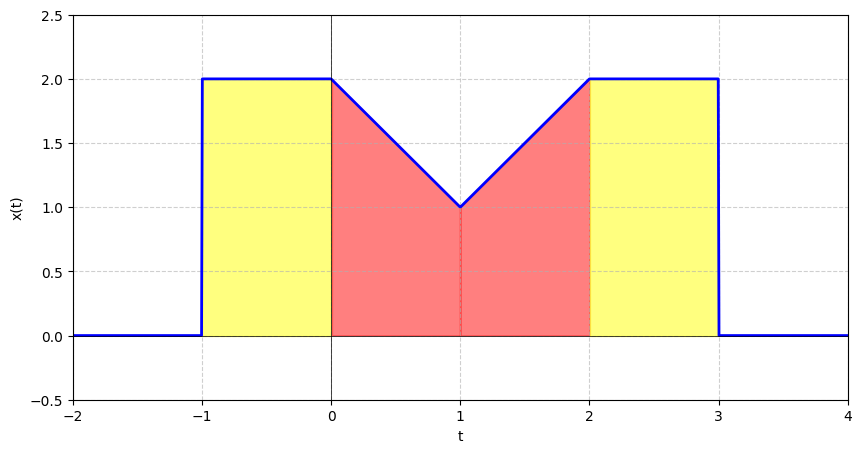

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Define the function x(t) based on your description
def x_t_new(t):
    return np.piecewise(t,
                        [(t < -1), (-1 < t) & (t <= 0), (0 < t) & (t <= 1), 
                         (1 < t) & (t <= 2), (2 < t) & (t <= 3), (t > 3)],
                        [0, 2, lambda t: 2 - t, lambda t: t, 2, 0])

# Create a range of t values
t = np.linspace(-2, 4, 1000)
y = x_t_new(t)

# Plot the function
plt.figure(figsize=(10, 5))
plt.plot(t, y, color='blue', linewidth=2)

# Fill the rectangles and trapezoids with different colors
plt.fill_between(t, y, where=(t > -1) & (t <= 0), color='yellow', alpha=0.5)  # Left rectangle
plt.fill_between(t, y, where=(t > 0) & (t <= 1), color='red', alpha=0.5)  # Left trapezoid
plt.fill_between(t, y, where=(t > 1) & (t <= 2), color='red', alpha=0.5)   # Right trapezoid
plt.fill_between(t, y, where=(t > 2) & (t <= 3), color='yellow', alpha=0.5)  # Right rectangle

# Add axis lines and labels
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.ylim(-0.5, 2.5)
plt.xlim(-2, 4)
plt.xlabel("t")
plt.ylabel("x(t)")  # Labeling the y-axis as requested
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()
